<a href="https://colab.research.google.com/github/sayu585/Caspstone1/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
  # Mounting drive
from google.colab import drive                  
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#reading the file
htl_df = pd.read_csv("/content/drive/MyDrive/Capstone 1 EDA/Hotel Bookings.csv")

In [ ]:
htl_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
htl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
htl_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


The dataframe has 32 columns, and several of them, like "children," "business," "country," and "agent," have null values

We will first make an effort to comprehend what each column in the dataframe means. For this, we shall notice the distinctive values that each column achieved, the significance of which we are unable to interpret.

In [ ]:
htlcpy = htl_df.copy()

In [ ]:
htlcpy['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
htlcpy['is_canceled'].unique()

array([0, 1])

In [ ]:
htlcpy['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [ ]:
htlcpy['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [ ]:
htlcpy['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [ ]:
htlcpy['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [ ]:
htlcpy['children'].unique() 

array([ 0.,  1.,  2., 10.,  3., nan])

In [ ]:
htlcpy['company'].unique()

array([ nan, 110., 113., 270., 178., 240., 154., 144., 307., 268.,  59.,
       204., 312., 318.,  94., 174., 274., 195., 223., 317., 281., 118.,
        53., 286.,  12.,  47., 324., 342., 373., 371., 383.,  86.,  82.,
       218.,  88.,  31., 397., 392., 405., 331., 367.,  20.,  83., 416.,
        51., 395., 102.,  34.,  84., 360., 394., 457., 382., 461., 478.,
       386., 112., 486., 421.,   9., 308., 135., 224., 504., 269., 356.,
       498., 390., 513., 203., 263., 477., 521., 169., 515., 445., 337.,
       251., 428., 292., 388., 130., 250., 355., 254., 543., 531., 528.,
        62., 120.,  42.,  81., 116., 530., 103.,  39.,  16.,  92.,  61.,
       501., 165., 291., 290.,  43., 325., 192., 108., 200., 465., 287.,
       297., 490., 482., 207., 282., 437., 225., 329., 272.,  28.,  77.,
       338.,  72., 246., 319., 146., 159., 380., 323., 511., 407., 278.,
        80., 403., 399.,  14., 137., 343., 346., 347., 349., 289., 351.,
       353.,  54.,  99., 358., 361., 362., 366., 37

In [ ]:
htlcpy['agent'].unique()

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

This column has 0 as well as null values

**Cleaning data**

Data cleaning is an important step before EDA since it removes ambiguous data that could alter the results of EDA.

We will take the following actions while cleaning data: 

1. Eliminate duplicate rows 
2. Handle missing values
3. Convert columns to the proper datatypes
4. Adding important columns


### **Eliminate duplicate row**

In [ ]:
htlcpy.shape

(119390, 32)

In [ ]:
htlcpy[htlcpy.duplicated()].shape

(31994, 32)

In [ ]:
# Dropping duplicate values
htlcpy.drop_duplicates(inplace = True)

In [ ]:
htlcpy.shape

(87396, 32)

**Handling missing values**

In [ ]:
# Columns having missing values
htlcpy.isnull().sum().sort_values(ascending = False)[:10]

company                   82137
agent                     12193
country                     452
children                      4
reserved_room_type            0
assigned_room_type            0
booking_changes               0
deposit_type                  0
hotel                         0
previous_cancellations        0
dtype: int64

Since the data in the company and agent columns includes the company number and agency number. There may be instances where a customer does not book a hotel through an agent or a company. In that situation, values in these columns can be null. In these columns, null values will be changed to zero.

In [ ]:
htlcpy[['company','agent']] = htlcpy[['company','agent']].fillna(0)

In [ ]:
htlcpy['children'].unique() 

array([ 0.        ,  1.        ,  2.        , 10.        ,  3.        ,
        0.13863969])

This column's value of 0 indicates that there were no children among the clients who completed the transaction. Therefore, "nan" values are missing values as a result of data recording errors. The children's mean value will be used to replace the null values under this column.

In [ ]:
htlcpy['children'].fillna(htlcpy['children'].mean(), inplace = True)

The next column, labelled "country," is empty. The customer's country of origin is represented in this column.  Considering that this column's datatype is a string. We will replace the missing value with the mode of 'country' column.

In [ ]:
htlcpy['country'].fillna('others', inplace = True)

In [ ]:
# Checking if all null values are removed
htlcpy.isnull().sum().sort_values(ascending = False)[:10]

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
adr                            0
customer_type                  0
days_in_waiting_list           0
company                        0
agent                          0
dtype: int64

There are some rows with a total adult, kid, or baby count of 0. So, we'll  eliminate of those rows.

In [ ]:
htlcpy[htlcpy['adults']+htlcpy['babies']+htlcpy['children'] == 0].shape

(166, 32)

In [ ]:
htlcpy.drop(htlcpy[htlcpy['adults']+htlcpy['babies']+htlcpy['children'] == 0].index,inplace = True)

In [ ]:
htlcpy.shape

(87230, 32)

**Converting columns to appropriate datatypes**

In [ ]:
# Converting datatype of columns 'children', 'company' and 'agent' from float to int.
htlcpy[['children', 'company', 'agent']] = htlcpy[['children', 'company', 'agent']].astype('int64')

In [ ]:
# changing datatype of column 'reservation_status_date' to data_type.
htlcpy['reservation_status_date'] = pd.to_datetime(htlcpy['reservation_status_date'], format = '%Y-%m-%d')

**Adding important columns**

In [ ]:
# Adding total staying days in hotels
htlcpy['total_stay'] = htlcpy['stays_in_weekend_nights']+htlcpy['stays_in_week_nights']

In [ ]:
# Adding total people num as column, i.e. total people num = num of adults + children + babies
htlcpy['total_people'] = htlcpy['adults']+htlcpy['children']+htlcpy['babies']

This column is being added so that we can analyse how long people stay in hotels.

# **EXPLORATORY DATA ANALYSIS**

Lets first find the correlation between the numerical data

Since "is cancelled," "arrival date year," "arrival date week," "arrival date day," "is repeated guest," "company," and "agent" columns include category data of a numerical form.We won't need to look for correlation.
Additionally, we've added columns for total stay and total people. Therefore, the columns for adults, kids, babies,  stays_in_weekend_nights and stays_in_week_nights columns can be deleted.


In [ ]:
num_htlcpy = htlcpy[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_stay','total_people']]


In [ ]:
num_htlcpy

,lead_time,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_stay,total_people
0,342,0,0,3,0,0.00,0,0,0,2
1,737,0,0,4,0,0.00,0,0,0,2
2,7,0,0,0,0,75.00,0,0,1,1
3,13,0,0,0,0,75.00,0,0,1,1
4,14,0,0,0,0,98.00,0,1,2,2
...,...,...,...,...,...,...,...,...,...,...
119385,23,0,0,0,0,96.14,0,0,7,2
119386,102,0,0,0,0,225.43,0,2,7,3
119387,34,0,0,0,0,157.71,0,4,7,2
119388,109,0,0,0,0,104.40,0,0,7,2


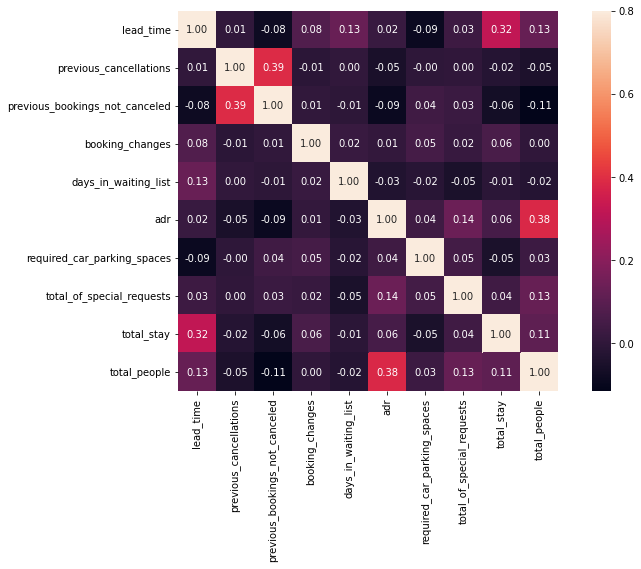

In [ ]:
#correlation matrix
corrmat = num_htlcpy.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corrmat,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True);



1.    Total stay length and lead time have slight correlation,This may indicate that longer hotel stays tend to be planned less in advance of the actual arrival.
2.  A little correlation exists between total people and adr , which makes sense given that higher  no. of people means more revenue, therefore more adr.



Lets see does length of stay affects the adr.

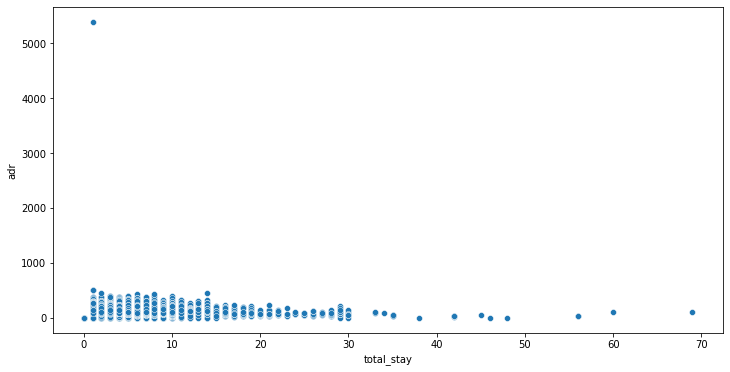

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = htlcpy)
plt.show()

We will eliminate the outlier in adr because it is an outlier and will improve the scatter plot.


In [ ]:
htlcpy.drop(htlcpy[htlcpy['adr'] > 5000].index, inplace = True)

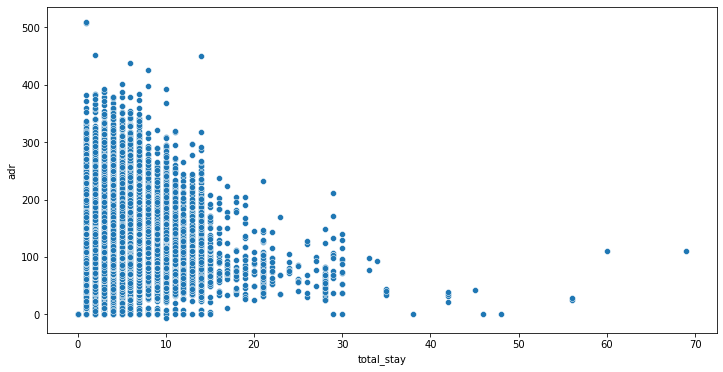

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = htlcpy)
plt.show()

We can see from the scatter plot that the adr drops as total_stay lengthens. This indicates that a better price for the consumer can be reached for a longer stay.

## **Univariate Analysis**

1. Which agent makes most no. of bookings?

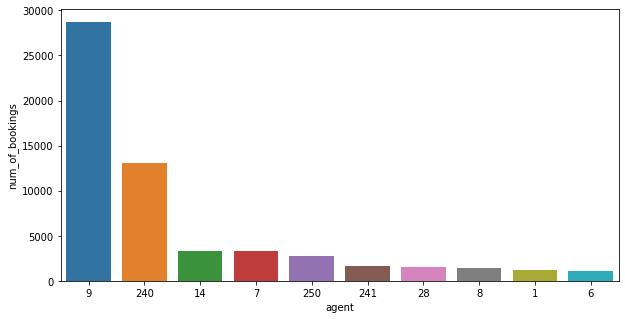

In [ ]:
d1 = pd.DataFrame(htlcpy['agent'].value_counts()).reset_index().rename(columns = {'index':'agent','agent':'num_of_bookings'}).sort_values(by = 'num_of_bookings', ascending = False)
d1.drop(d1[d1['agent'] == 0].index, inplace = True)            # 0 represents that booking is not made by an agent
d1 = d1[:10]                                                   # Selecting top 10 performing agents
plt.figure(figsize = (10,5))
sns.barplot(x = 'agent', y = 'num_of_bookings', data = d1, order = d1.sort_values('num_of_bookings', ascending = False).agent)

Agent  9 has made most no. of bookings.

2.Which room category generates the highest adr and is the most in demand?

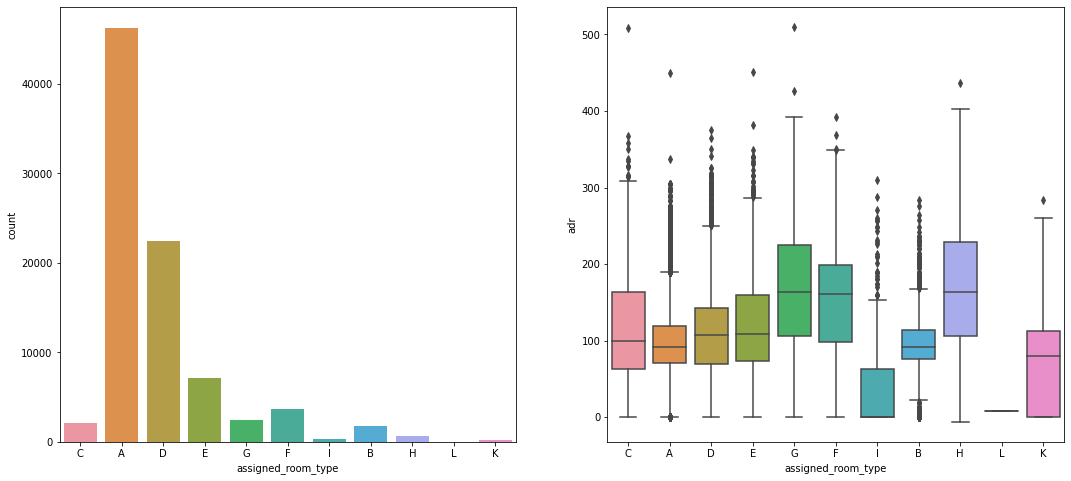

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

grp_by_room = htlcpy.groupby('assigned_room_type')
d1['Num_of_bookings'] = grp_by_room.size()

sns.countplot(ax = axes[0], x = htlcpy['assigned_room_type'])
sns.boxplot(ax = axes[1], x = htlcpy['assigned_room_type'], y = htlcpy['adr'])
plt.show()

The most common room type is A, however better adr rooms can also be found in types H, G, and C. To maximise revenue, hotels should offer more A and H room types.

3. Which meal type is most preffered meal of customers?

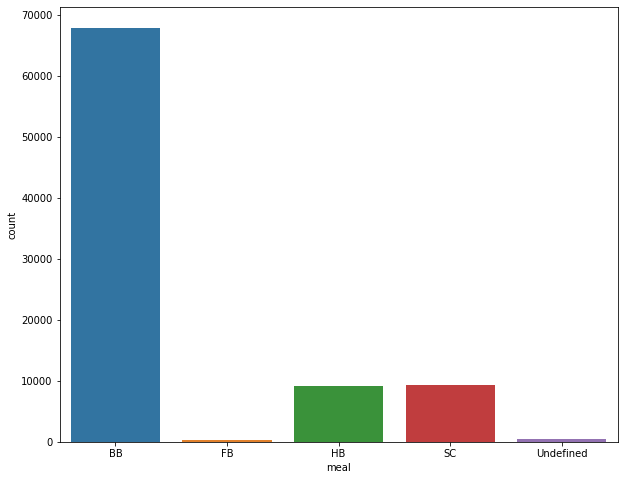

In [ ]:
plt.figure( figsize=(10, 8))

sns.countplot(x = htlcpy['meal'])
plt.show()

Most preferred meal type is BB

#Hotel wise analysis

1. What is percentage of bookings in each hotel?

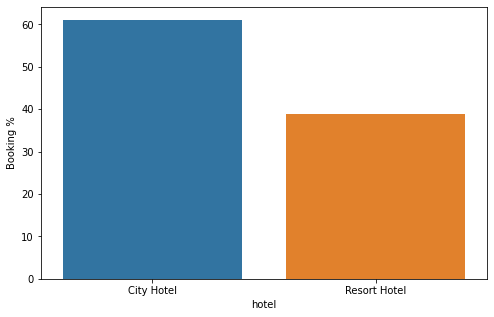

In [ ]:
grouped_by_hotel = htlcpy.groupby('hotel')
d1 = pd.DataFrame((grouped_by_hotel.size()/htlcpy.shape[0])*100).reset_index().rename(columns = {0:'Booking %'})      #Calculating percentage
plt.figure(figsize = (8,5))
sns.barplot(x = d1['hotel'], y = d1['Booking %'] )
plt.show()

40% of reservations are for resort hotels, while 60% are for city hotels.

2. Which hotel makes more revenue

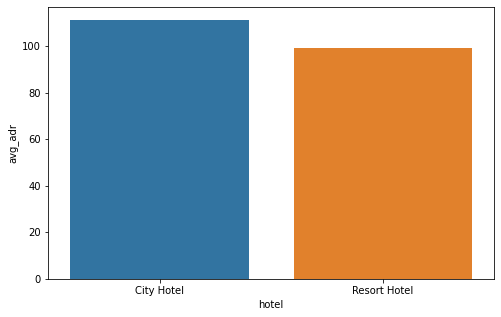

In [ ]:
d3 = grouped_by_hotel['adr'].agg(np.mean).reset_index().rename(columns = {'adr':'avg_adr'})   # calculating average adr
plt.figure(figsize = (8,5))
sns.barplot(x = d3['hotel'], y = d3['avg_adr'] )
plt.show()

City hortels make more ervenue

3.  Which hotel has higher lead time?

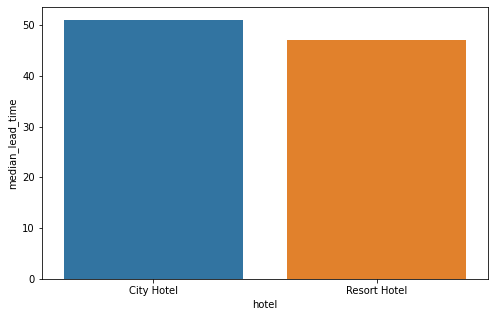

In [ ]:
d2 = grouped_by_hotel['lead_time'].median().reset_index().rename(columns = {'lead_time':'median_lead_time'})
plt.figure(figsize = (8,5))
sns.barplot(x = d2['hotel'], y = d2['median_lead_time'] )
plt.show()

A little longer median lead time is found in city hotels. Additionally, the median lead time is much longer in each scenario, indicating that customers typically book their hotel stays far in advance.

4. What is preferred stay length in each hotel?

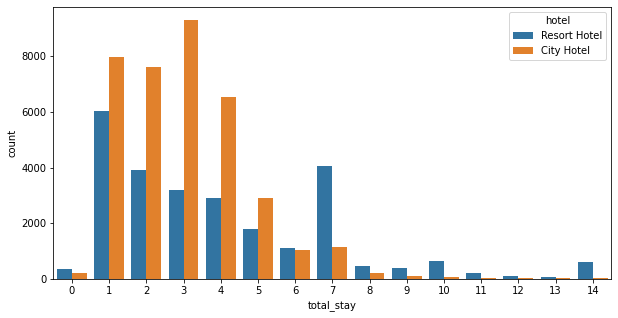

In [ ]:
not_canceled = htlcpy[htlcpy['is_canceled'] == 0]
s1 = not_canceled[not_canceled['total_stay'] < 15]
plt.figure(figsize = (10,5))
sns.countplot(x = s1['total_stay'], hue = s1['hotel'])
plt.show()

The most typical duration of stay is under 4 days, and people typically prefer city hotels for brief stays but resort hotels for extended stays.

5.  Which hotel has longer waiting time?

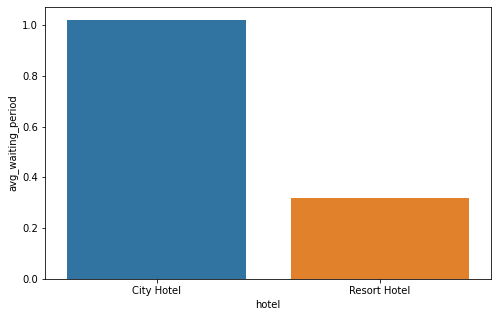

In [ ]:
d5 = pd.DataFrame(grouped_by_hotel['days_in_waiting_list'].agg(np.mean).reset_index().rename(columns = {'days_in_waiting_list':'avg_waiting_period'}))
plt.figure(figsize = (8,5))
sns.barplot(x = d5['hotel'], y = d5['avg_waiting_period'] )
plt.show()

Since there is a considerably longer wait at City Hotel, it is much busier than Resort Hotel.

6. Which hotel has higher bookings cancellation rate.

In [ ]:
# Selecting and counting number of cancelled bookings for each hotel.
cancelled_data = htlcpy[htlcpy['is_canceled'] == 1]
cancel_grp = cancelled_data.groupby('hotel')
D1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'total_cancelled_bookings'})

# Counting total number of bookings for each type of hotel
grouped_by_hotel = htlcpy.groupby('hotel')
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating cancel percentage 
D3['cancel_%'] = round((D3['total_cancelled_bookings']/D3['total_bookings'])*100,2)
D3

,total_cancelled_bookings,total_bookings,cancel_%
hotel,,,
City Hotel,16034,53273,30.10
Resort Hotel,7974,33956,23.48


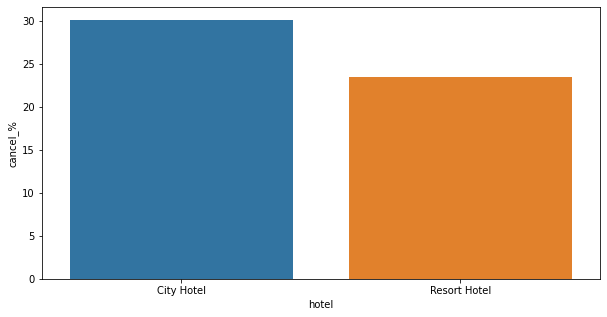

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(x = D3.index, y = D3['cancel_%'])
plt.show()

# Distribution Channel wise Analysis

1.  Which is the most common channel for booking hotels?

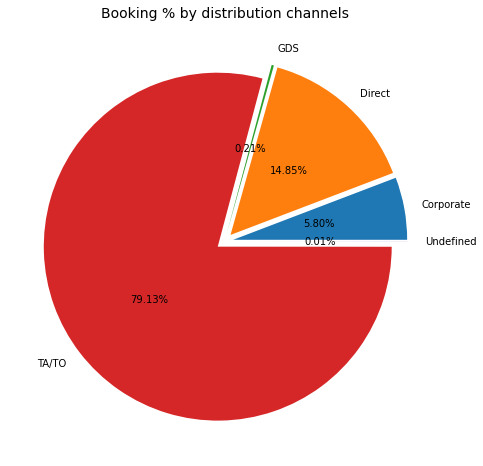

In [ ]:
group_by_dc = htlcpy.groupby('distribution_channel')
d1 = pd.DataFrame(round((group_by_dc.size()/htlcpy.shape[0])*100,2)).reset_index().rename(columns = {0: 'Booking_%'})
plt.figure(figsize = (8,8))
data = d1['Booking_%']
labels = d1['distribution_channel']
plt.pie(x=data, autopct="%.2f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5)
plt.title("Booking % by distribution channels", fontsize=14);

2. Which distribution channel brings better revenue generating deals for hotels?

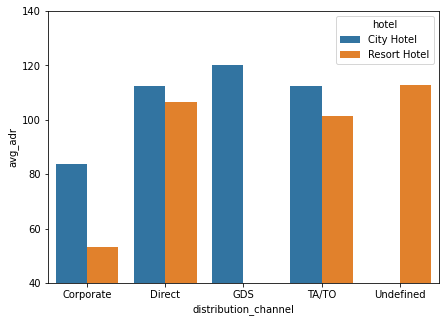

In [ ]:
group_by_dc_hotel = htlcpy.groupby(['distribution_channel', 'hotel'])
d5 = pd.DataFrame(round((group_by_dc_hotel['adr']).agg(np.mean),2)).reset_index().rename(columns = {'adr': 'avg_adr'})
plt.figure(figsize = (7,5))
sns.barplot(x = d5['distribution_channel'], y = d5['avg_adr'], hue = d5['hotel'])
plt.ylim(40,140)
plt.show()

In contrast to the majority of bookings, which originate from TA/TO, GDS channel delivers better revenue-generating transactions for City hotels. In order to secure additional partnerships that will generate more revenues, City Hotel can try to expand its reach on GDS channels.

Resort hotels generate more revenue through direct and TA/TO channel partnerships. To boost sales, resort hotels must expand their GDS channel reach.

# Booking cancellation analysis

1. Which significant distribution channel has highest cancellation percentage?

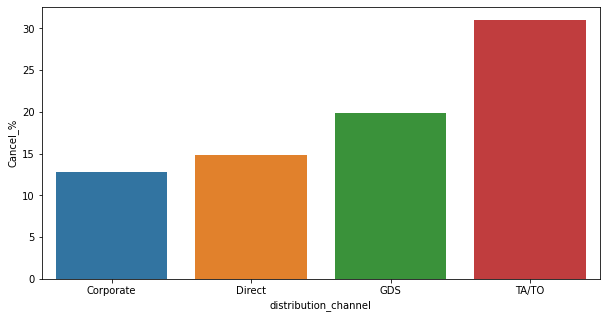

In [ ]:
d1 = pd.DataFrame((group_by_dc['is_canceled'].sum()/group_by_dc.size())*100).drop(index = 'Undefined').rename(columns = {0: 'Cancel_%'})
plt.figure(figsize = (10,5))
sns.barplot(x = d1.index, y = d1['Cancel_%'])
plt.show()

Most booking cancellations occur in TA/TO. A booking made through TA/TO is thus 30% likely to be cancelled.

2.  what causes the cancelation of bookings of rooms by customers?

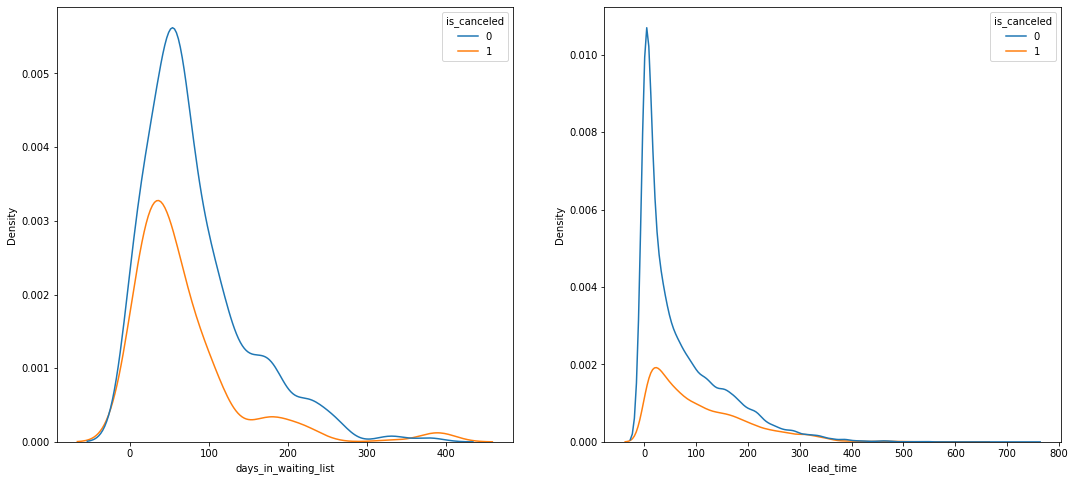

In [ ]:
waiting_bookings = htlcpy[htlcpy['days_in_waiting_list'] !=0]  # Selecting bookings with non zero waiting time


fig, axes = plt.subplots(1, 2, figsize=(18, 8))
sns.kdeplot(ax=axes[0],x = 'days_in_waiting_list', hue = 'is_canceled' , data = waiting_bookings)
sns.kdeplot(ax = axes[1], x = htlcpy['lead_time'], hue = htlcpy['is_canceled'])
plt.show()

While it is evident that the majority of cancelled reservations have waiting periods under 150 days, the majority of confirmed reservations also do. This demonstrates that the waiting period has no bearing on booking cancellations.

Additionally, because both the cancellation and not-cancellation curves for lead time are comparable, lead time has no bearing on booking cancellations.

Now we will check whether not getting allotted the same room type as demanded is the cause of cancellation fo bookings

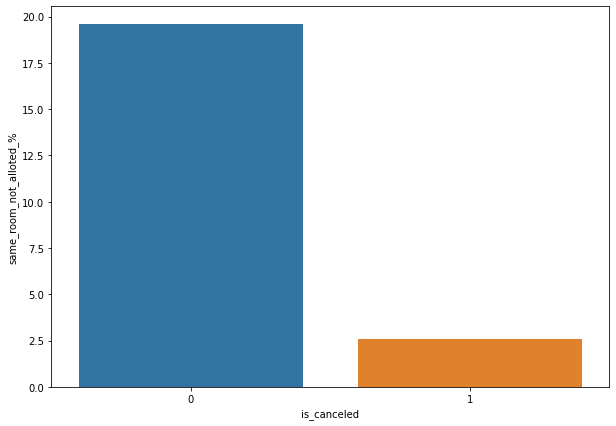

In [ ]:
def check_room_allot(x):
  if x['reserved_room_type'] != x['assigned_room_type']:
    return 1
  else:
    return 0

htlcpy['same_room_not_alloted'] = htlcpy.apply(lambda x : check_room_allot(x), axis = 1)
grp_by_canc = htlcpy.groupby('is_canceled')

D3 = pd.DataFrame((grp_by_canc['same_room_not_alloted'].sum()/grp_by_canc.size())*100).rename(columns = {0: 'same_room_not_alloted_%'})
plt.figure(figsize = (10,7))
sns.barplot(x = D3.index, y = D3['same_room_not_alloted_%'])
plt.show()

As you can see, reservations were not cancelled because you did not receive the exact accommodation you requested. Even when requested rooms are obtained, a sizable portion of reservations are not cancelled.

Lets see does not getting same room affects the adr

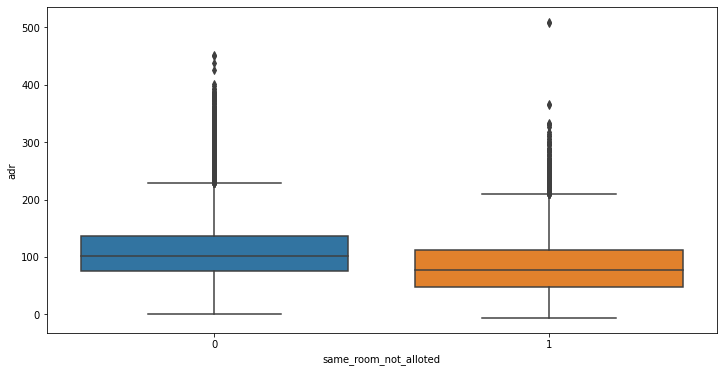

In [ ]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'same_room_not_alloted', y = 'adr', data = htlcpy)
plt.show()

So not getting same room do affects the adr, people who didn't got same room have paid a little lower adr, except for few exceptions

# Time wise analysis

1. Which are the most busy months?

In [ ]:
d_month = htlcpy['arrival_date_month'].value_counts().reset_index()
d_month.columns=['months','Number of guests']
d_month
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
d_month['months'] = pd.Categorical(d_month['months'], categories=months, ordered=True)
d_month.sort_values('months').reset_index()


data_resort = htlcpy[(htlcpy['hotel'] == 'Resort Hotel') & (htlcpy['is_canceled'] == 0)]
data_city = htlcpy[(htlcpy['hotel'] == 'City Hotel') & (htlcpy['is_canceled'] == 0)]
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
final_hotel

resort_guest = data_resort['arrival_date_month'].value_counts().reset_index()
resort_guest.columns=['month','no of guests']
resort_guest

city_guest = data_city['arrival_date_month'].value_counts().reset_index()
city_guest.columns=['month','no of guests']
city_guest

final_guest=resort_guest.merge(city_guest, on = 'month')
final_guest.columns=['month','no of guests in resort','no of guest in city hotel']
final_guest
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
final_guest['month'] = pd.Categorical(final_guest['month'], categories=months, ordered=True)
final_guest = final_guest.sort_values('month').reset_index()

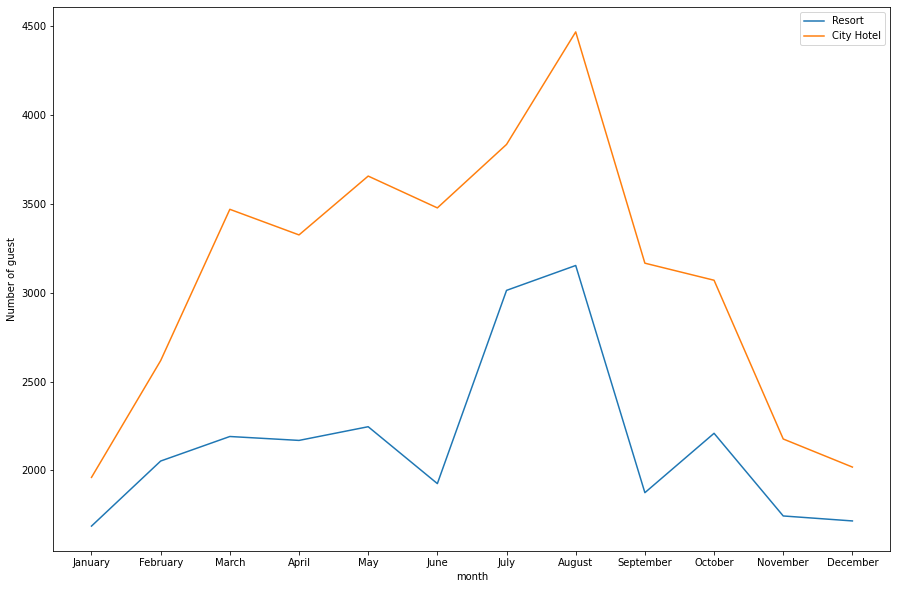

In [ ]:
sns.lineplot(data=final_guest, x='month', y='no of guests in resort')
sns.lineplot(data=final_guest, x='month', y='no of guest in city hotel')
plt.legend(['Resort','City Hotel'])
plt.ylabel('Number of guest')
fig = plt.gcf()
fig.set_size_inches(15,10)

Most number of guest comes in month of August.

# **From where the most guests are coming ?**

In [ ]:
country_wise_guests = htlcpy[htlcpy['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']
country_wise_guests

,country,No of guests
0,PRT,17573
1,GBR,8440
2,FRA,7091
3,ESP,5382
4,DEU,4332
...,...,...
161,ZMB,1
162,SYC,1
163,MDG,1
164,SMR,1


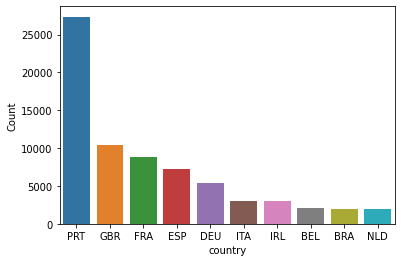

In [ ]:
grouped_by_country = htlcpy.groupby('country')
d1 = pd.DataFrame(grouped_by_country.size()).reset_index().rename(columns = {0:'Count'}).sort_values('Count', ascending = False)[:10]
sns.barplot(x = d1['country'], y  = d1['Count'])
plt.show()

# How long do people stay at the hotels?

In [ ]:
filter = htlcpy['is_canceled'] == 0
data = htlcpy[filter]
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_people,same_room_not_alloted
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2,0


In [ ]:
data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_people,same_room_not_alloted,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,0,2,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,0,2,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,1,1,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,1,1,0,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,2,2,0,2


In [ ]:
stay = data.groupby(['total_nights', 'hotel']).agg('count').reset_index()
stay = stay.iloc[:, :3]
stay = stay.rename(columns={'is_canceled':'Number of stays'})
stay

,total_nights,hotel,Number of stays
0,0,City Hotel,218
1,0,Resort Hotel,350
2,1,City Hotel,7972
3,1,Resort Hotel,6036
4,2,City Hotel,7630
...,...,...,...
57,46,Resort Hotel,1
58,48,City Hotel,1
59,56,Resort Hotel,1
60,60,Resort Hotel,1


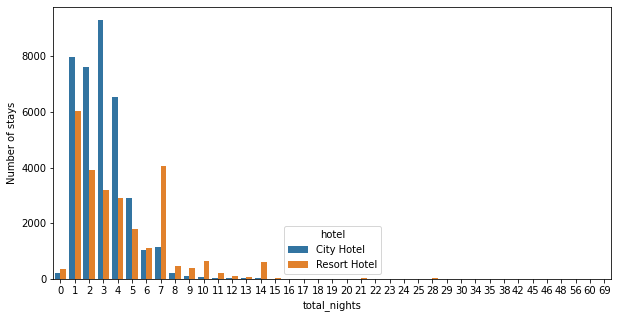

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'total_nights', y = 'Number of stays',data= stay,hue='hotel')

The majority of consumers favour hotel stays of at least five days.
